In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

/home/chetan/ana/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
df=pd.read_csv('../TF_2_Notebooks_and_Data/DATA/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [7]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
RSCCASN    334 non-null int64
dtypes: int64(1)
memory usage: 5.2 KB


In [9]:
df.columns=['Sales']

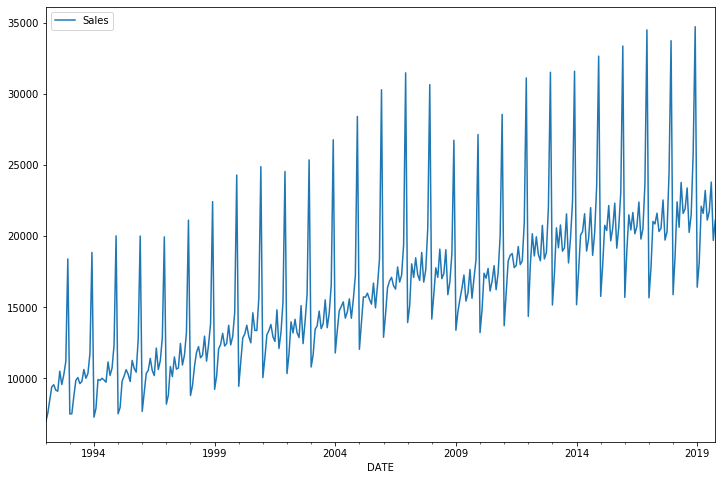

In [10]:
df.plot(figsize=(12,8))

In [11]:
len(df)

334

In [12]:
len(df)-18

316

In [13]:
test_size=18
test_index=len(df)-test_size

In [14]:
train=df.iloc[:test_index]
test=df.iloc[test_index:]

In [15]:
train

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585


In [16]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [19]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaled_train=scaler.transform(train)

In [22]:
scaled_test=scaler.transform(test)

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
len(test)

18

In [25]:
length=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,
                             batch_size=1)

In [26]:
X,y=generator[0]

In [27]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [28]:
y

array([[0.02047633]])

In [29]:
scaled_train

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053],
       [0.08146965],
       [0.07860151],
       [0.12979233],
       [0.09566512],
       [0.1203892 ],
       [0.15426227],
       [0.41595266],
       [0.02047633],
       [0.02127505],
       [0.06636654],
       [0.10633895],
       [0.11345484],
       [0.09791606],
       [0.10368864],
       [0.13396747],
       [0.11163956],
       [0.12372931],
       [0.17506535],
       [0.43250799],
       [0.0124165 ],
       [0.03499855],
       [0.10829945],
       [0.10641156],
       [0.11149434],
       [0.10728289],
       [0.10154662],
       [0.1531731 ],
       [0.11904589],
       [0.13767064],
       [0.19663085],
       [0.47480395],
       [0.02105722],
       [0.03714058],
       [0.10445106],
       [0.11726692],
       [0.13367703],
       [0.12209556],
       [0.10332559],
       [0.1570578 ],
       [0.13694453],
       [0.12710572],
       [0.21104415],
       [0.474

In [30]:
len(X[0])

12

In [31]:
from tensorflow.keras.models import Sequential

In [32]:
from tensorflow.keras.layers import Dense,LSTM

In [33]:
n_features=1

In [37]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
earlystop=EarlyStopping(monitor='val_loss',patience=2)

In [41]:
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,
                                        batch_size=1)

In [42]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,
                   callbacks=[earlystop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 304 steps, validate for 6 steps
Epoch 1/20
304/304 [==============================] - 5s 18ms/step - loss: 0.0254 - val_loss: 0.0026
Epoch 2/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0189 - val_loss: 0.0025
Epoch 3/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0136 - val_loss: 0.0246
Epoch 4/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0076 - val_loss: 0.0134


In [43]:
loss=pd.DataFrame(model.history.history)

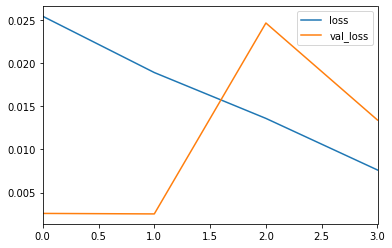

In [44]:
loss.plot()

In [46]:
test_predictions=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features,))

for i in range(len(test)):
    
    current_pred=model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [47]:
true_predictions=scaler.inverse_transform(test_predictions)

In [48]:
test['Predictions']=true_predictions

/home/chetan/ana/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,23790.751072
2018-06-01,21589,22821.798233
2018-07-01,21919,23164.026015
2018-08-01,23381,24942.893697
2018-09-01,20260,22813.213520
2018-10-01,21473,23809.314343
2018-11-01,25831,28564.312557
2018-12-01,34706,38447.798977
2019-01-01,16410,19899.288908


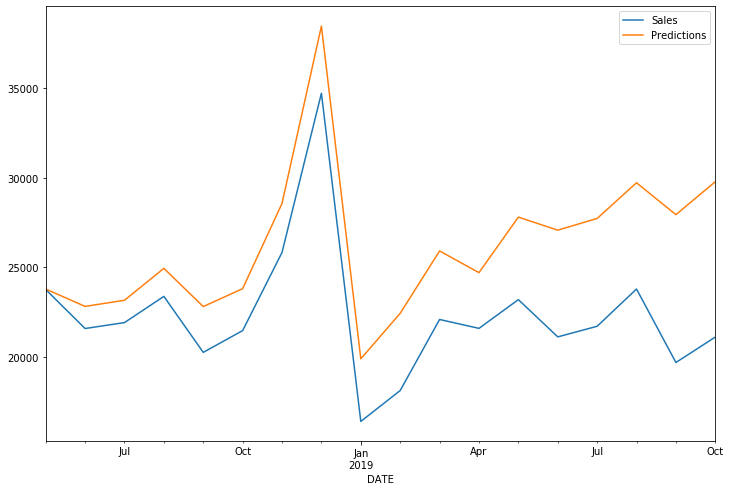

In [50]:
test.plot(figsize=(12,8))

In [51]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(df)

In [52]:
length=12
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,
                             length=length,batch_size=1)

In [53]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator,epochs=4)

  ...
    to  
  ['...']
Train for 322 steps
Epoch 1/4
322/322 [==============================] - 9s 27ms/step - loss: 0.0227
Epoch 2/4
322/322 [==============================] - 7s 21ms/step - loss: 0.0172
Epoch 3/4
322/322 [==============================] - 5s 16ms/step - loss: 0.0098
Epoch 4/4
322/322 [==============================] - 5s 16ms/step - loss: 0.0085


In [55]:
forecast=[]

periods=12

first_eval_batch=scaled_full_data[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    
    current_pred=model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [57]:
forecast=scaler.inverse_transform(forecast)

In [58]:
forecast

array([[24856.15674353],
       [32417.48581886],
       [19260.74324942],
       [20078.3973031 ],
       [22260.40827227],
       [21984.53675461],
       [22961.01373577],
       [21743.85451365],
       [22119.13893938],
       [23403.56231451],
       [21066.5487709 ],
       [21910.70395851]])

In [60]:
forecast_index=pd.date_range(start='2019-11-01',periods=periods,
                            freq='MS')

In [61]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [62]:
forecast_df=pd.DataFrame(data=forecast,index=forecast_index,
                        columns=['Forecast'])

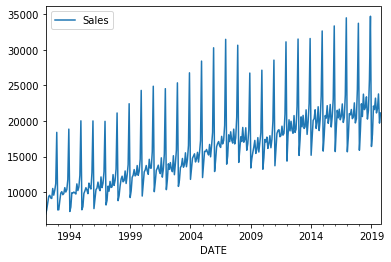

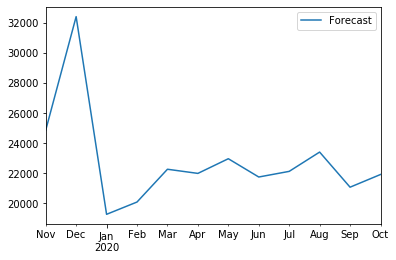

In [64]:
df.plot()
forecast_df.plot()

(576, 611)

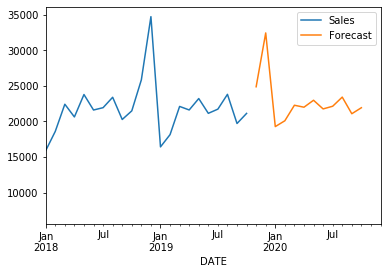

In [65]:
ax=df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')